In [20]:
from gala.units import UnitSystem
from astropy import units as u
usys = UnitSystem(u.kpc, u.Myr, u.Msun, u.radian)
import jax.numpy as jnp
from astropy.coordinates import SkyCoord, Galactocentric


import matplotlib.pyplot as plt
import jax
jax.config.update("jax_enable_x64", True)
from functools import partial

from streamsculptor import potential

import numpy as np



In [2]:
pot = potential.GalaMilkyWayPotential(units=usys)

In [11]:
np.random.seed(42)  
N = 100
x0s = np.random.normal(loc=0,scale=0.2,size=(N,3))
v0s = np.random.normal(loc=0,scale=0.05,size=(N,3))
x0, v0 = jnp.array([20,20.0,20]), jnp.array([.1,.05,.08])
w0_arr = jnp.hstack([x0 + x0s,v0 + v0s])
ts = jnp.linspace(0,2000,500)


In [12]:
orbits = pot.integrate_orbit_batch_scan(w0=w0_arr,ts=ts)

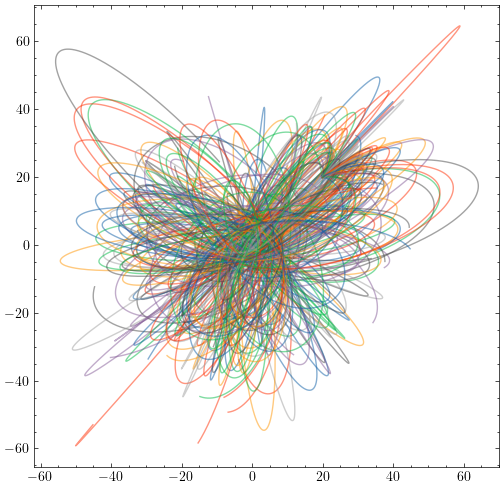

In [23]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,6)
for i in range(N):
    ax.plot(orbits.ys[i,:,0],orbits.ys[i,:,2],alpha=0.5)

In [18]:
orbits.ys.shape

(100, 500, 6)